In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Input
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, add,Dropout,Dense,Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, Callback
import sklearn
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data set to the Google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y_val=np.load('/content/drive/MyDrive/CQT files/Ytestfinal.npy' ,mmap_mode= 'r')
print(y_val.shape)

(15219, 38, 1, 88)


In [ ]:
X_val=np.load('/content/drive/MyDrive/CQT files/Xtestfinal.npy',mmap_mode= 'r')
print(X_val.shape)

(15219, 38, 1, 252)


In [ ]:
y_train=np.load('/content/drive/MyDrive/CQT files/Ytrainfinal.npy' ,mmap_mode= 'r')
print(y_train.shape)
X_train=np.load('/content/drive/MyDrive/CQT files/Xtrainfinal.npy' ,mmap_mode= 'r')
print(X_train.shape)

(47805, 38, 1, 88)
(47805, 38, 1, 252)


In [ ]:
mini_batch_size=256

In [ ]:
# The X_train is converted to 4 dimension with a mini_batch size of 400 
X_train = X_train[:int(X_train.shape[0]/mini_batch_size)*mini_batch_size,:]
print(X_train.shape)

(47616, 38, 1, 252)


In [ ]:
# The Y_train is converted to 4 dimension with a mini_batch size of 400 similar to X_train
y_train = y_train[:int(y_train.shape[0]/mini_batch_size)*mini_batch_size,:]
print(y_train.shape)

(47616, 38, 1, 88)


In [ ]:
X_train=tf.transpose(X_train, perm=[0, 1, 3, 2])
X_val=tf.transpose(X_val, perm=[0, 1, 3, 2])

In [ ]:
# shape of validation set :
print(X_val.shape)
print(y_val.shape)

(15219, 38, 252, 1)
(15219, 38, 1, 88)


In [ ]:
minibatch= True

In [ ]:
# training the data in tensorflow with mini batch size equal to 400
train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_data = train_data.batch(mini_batch_size)

validation_data = tf.data.Dataset.from_tensor_slices((X_val,y_val))
validation_data = validation_data.batch(mini_batch_size)

In [ ]:
print(train_data)
print(validation_data)

<BatchDataset shapes: ((None, 38, 252, 1), (None, 38, 1, 88)), types: (tf.float64, tf.float64)>
<BatchDataset shapes: ((None, 38, 252, 1), (None, 38, 1, 88)), types: (tf.float64, tf.float64)>


In [ ]:
# parameters for the layers of neural network 
window_size=7
min_midi = 21
max_midi = 108
note_range = max_midi - min_midi + 1

In [ ]:
input_shape=(None, 38, 252, 1)
model=tf.keras.Sequential()

#stage1
model.add(Conv2D(filters=50, kernel_size=(5,25), activation='elu', input_shape=input_shape, padding="same", strides=1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1, 3), strides=(1,3), padding="same"))

#stage2
model.add(Conv2D(filters=50, kernel_size=(3,5), strides=1, activation='elu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1, 3), strides=(1,3), padding="same"))

#stage3
model.add(Conv2D(filters=1000, kernel_size=(1,28), activation='elu'))
model.add(Dropout(rate=0.5))

#stage4
model.add(Conv2D(filters=500, kernel_size=1, activation='elu', padding="same"))
model.add(Dropout(rate=0.5))

#stage5
model.add(Conv2D(filters=88, kernel_size=1, activation='sigmoid'))

In [ ]:
# Code for the Accuracy of the Model 
class AccuracyHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [ ]:
# Calculating the accuracy of the model using adam as optimizer and the learning rate is 0.001
optimizer1 = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer= optimizer1, metrics=['accuracy'])
history = AccuracyHistory()

# checkpoint = ModelCheckpoint(model_ckpt,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
early_stop = EarlyStopping(patience=5, monitor='val_loss',verbose=1, mode='min')
callbacks = [history,early_stop]

In [ ]:
history = model.fit(train_data,epochs=12,batch_size=mini_batch_size,validation_data=validation_data, verbose = 1, callbacks=callbacks)

Epoch 1/12
186/186 [==============================] - 156s 651ms/step - loss: 0.0685 - accuracy: 0.3658 - val_loss: 0.0856 - val_accuracy: 0.3179
Epoch 2/12
186/186 [==============================] - 122s 658ms/step - loss: 0.0670 - accuracy: 0.3648 - val_loss: 0.0830 - val_accuracy: 0.3011
Epoch 3/12
186/186 [==============================] - 122s 655ms/step - loss: 0.0658 - accuracy: 0.3670 - val_loss: 0.0844 - val_accuracy: 0.2943
Epoch 4/12
186/186 [==============================] - 123s 660ms/step - loss: 0.0643 - accuracy: 0.3696 - val_loss: 0.0817 - val_accuracy: 0.3071
Epoch 5/12
186/186 [==============================] - 122s 656ms/step - loss: 0.0629 - accuracy: 0.3707 - val_loss: 0.0800 - val_accuracy: 0.2929
Epoch 6/12
186/186 [==============================] - 122s 656ms/step - loss: 0.0619 - accuracy: 0.3725 - val_loss: 0.0763 - val_accuracy: 0.3024
Epoch 7/12
186/186 [==============================] - 122s 655ms/step - loss: 0.0608 - accuracy: 0.3725 - val_loss: 0.0825 -

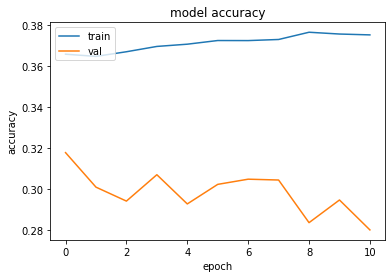

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

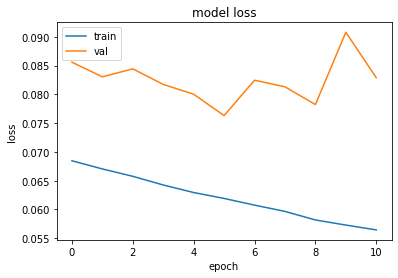

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 38, 252, 50)       6300      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 38, 252, 50)       200       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 38, 84, 50)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 38, 84, 50)        37550     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 38, 84, 50)        200       
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 38, 28, 50)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 38, 1, 1000)       1

In [ ]:
def opt_thresholds(y_true,y_scores):
    othresholds = np.zeros(y_scores.shape[1])
    print(othresholds.shape)
    for label, (label_scores, true_bin) in enumerate(zip(y_scores.T,y_true.T)):
        precision, recall, thresholds = sklearn.metrics.precision_recall_curve(true_bin, label_scores)
        max_f1 = 0
        max_f1_threshold = .5
        for r, p, t in zip(recall, precision, thresholds):
            if p + r == 0: continue
            if (2*p*r)/(p + r) > max_f1:
                max_f1 = (2*p*r)/(p + r)
                max_f1_threshold = t
        # print("label %f: max_f1_threshold %f => max_f1 %f" %(label, max_f1_threshold, max_f1))
        othresholds[label] = max_f1_threshold
    return othresholds

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
#calculating threshold on validation data
x, y_true=X_val, y_val
y_scores=model.predict(x)
y_scores=np.reshape(y_scores, (578322, 88))
y_val=np.reshape(y_val, (578322, 88))
othresholds = opt_thresholds(y_true,y_scores)

#evaludate this over validation data
y_pred = y_scores > othresholds
#precision, recall, fbetascore, support =>p, r, f, s
p,r,f,s = sklearn.metrics.precision_recall_fscore_support(y_true,y_pred,average='micro')
print("%f %f %f" %(p, r, f))

(88,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


0.700020 0.731141 0.715242


In [ ]:
np.save('y_pred.npy', y_pred)